# Logistic Regression on Heart Disease Dataset

This project uses the Framingham Heart Study dataset to predict whether an individual is at risk of developing heart disease using Logistic Regression. The notebook walks through data loading, cleaning, visualization, model training, and evaluation.


## Dataset

- To download the dataset use the link give below or download the file called framingham.csv in the repositary file. 
- Which includes medical records for cardiovascular disease prediction. 
- https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression

In [23]:
#Laoding Pandas Library.
import pandas as pd

In [24]:
#Loading the data set into the notebook.
data = pd.read_csv('framingham.csv')

In [25]:
#Viewing First 10 rows of the data set.
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [26]:
#Getting more detailed information about the dataset
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [27]:
#Dropping rows with NULl values
data = data.dropna( axis = 0 )

In [28]:
#Checking for duplicate records.
data.duplicated().sum()

np.int64(0)

In [29]:
#Dropping Education Column as it is not required.
data.drop('education', axis = 1, inplace = True)

In [30]:
data['TenYearCHD'].unique()

array([0, 1])

In [31]:
#Loading visualization libraries.
import matplotlib.pyplot as plt
import seaborn as sns

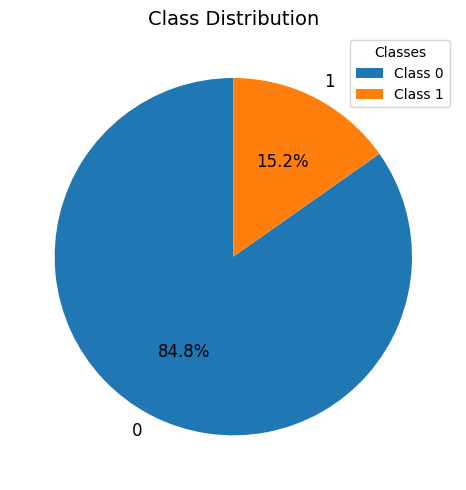

In [32]:
tenyear_count = data['TenYearCHD'].value_counts()
plt.figure(figsize=(5,5))
patches, texts, autotexts = plt.pie(
    tenyear_count.values,
    labels= tenyear_count.index,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

plt.title('Class Distribution', fontsize=14)
plt.legend(patches, labels, title="Classes", loc="best")
plt.tight_layout()
plt.show()

In [33]:
#Loading MinMax Scaler for Scaling the data.
from sklearn.preprocessing import MinMaxScaler

In [34]:
#Initializing scaler variable.
scaler = MinMaxScaler()

In [35]:
for col in data.columns:
    if col != 'TenYearCHD':
        data[col] = scaler.fit_transform(data[[col]])

In [36]:
#Viewing the dataset after scaling.
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,0.0,0.000000,0.0,0.0,0.0,0.0,0.168378,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0.0,0.368421,0.0,0.000000,0.0,0.0,0.0,0.0,0.281314,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1.0,0.421053,1.0,0.285714,0.0,0.0,0.0,0.0,0.271047,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0.0,0.763158,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0.0,0.368421,1.0,0.328571,0.0,0.0,0.0,0.0,0.353183,0.219858,0.380952,0.183228,0.414141,0.127119,0
5,0.0,0.289474,0.0,0.000000,0.0,0.0,1.0,0.0,0.236140,0.456265,0.656085,0.357731,0.333333,0.166667,0
6,0.0,0.815789,0.0,0.000000,0.0,0.0,0.0,0.0,0.188912,0.257683,0.243386,0.425836,0.161616,0.127119,1
7,0.0,0.342105,1.0,0.285714,0.0,0.0,0.0,0.0,0.410678,0.078014,0.243386,0.148812,0.353535,0.107345,0
8,1.0,0.526316,0.0,0.000000,0.0,0.0,1.0,0.0,0.301848,0.274232,0.433862,0.262239,0.323232,0.110169,0
9,1.0,0.289474,1.0,0.428571,0.0,0.0,1.0,0.0,0.229979,0.371158,0.624339,0.195589,0.494949,0.135593,0


In [37]:
#Detailed information about the dataset after scaling. 
data.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,0.462038,0.489059,0.128888,0.030361,0.005744,0.311543,0.027079,0.254360,0.231054,0.369440,0.248284,0.320511,0.118238,0.152352
std,0.496883,0.225293,0.499949,0.170270,0.171602,0.075581,0.463187,0.162335,0.090547,0.104456,0.126718,0.098544,0.121040,0.067543,0.359411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190965,0.158392,0.285714,0.182744,0.242424,0.087571,0.000000
50%,0.000000,0.447368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.248460,0.210402,0.359788,0.238488,0.313131,0.107345,0.000000
75%,1.000000,0.631579,1.000000,0.285714,0.000000,0.000000,1.000000,0.000000,0.308522,0.286052,0.444444,0.302957,0.383838,0.132768,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y = data['TenYearCHD']
X = data.drop('TenYearCHD', axis = 1 )

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
lr = LogisticRegression()

In [43]:
lr.fit(X_train,y_train)

LogisticRegression()

In [44]:
predictions = lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [46]:
print(accuracy_score(predictions,y_test)*100)

84.2896174863388


In [47]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       723
           1       0.07      0.89      0.12         9

    accuracy                           0.84       732
   macro avg       0.53      0.87      0.52       732
weighted avg       0.99      0.84      0.90       732



In [48]:
print(confusion_matrix(predictions, y_test))

[[609 114]
 [  1   8]]


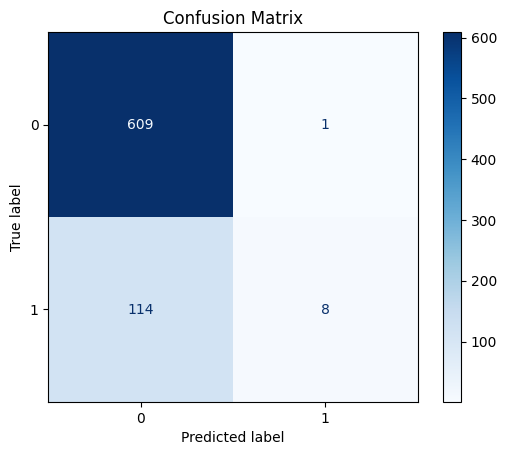

In [51]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Based on the confusion matrix, precision, and F1 score, the current model performs very well in predicting class 0, but poorly identifies class 1. This discrepancy is likely due to the class imbalance in the dataset, where approximately 84.8% of the samples belong to class 0 and only 15.2% to class 1. This imbalance biases the model toward predicting the majority class. To improve the performance, especially for class 1, we can consider using a more advanced classification model, applying techniques such as resampling (e.g., SMOTE or undersampling), or collecting a more balanced dataset that includes a higher proportion of class 1 examples.